In [28]:
import pandas as pd

In [44]:
import numpy as np

In [52]:
data = pd.read_csv('Hospital_Inpatient_Discharges__SPARCS_De-Identified___Cost_Transparency__Beginning_2009_20250426.csv')

In [30]:
data.head()

,Year,Facility Id,Facility Name,APR DRG Code,APR Severity of Illness Code,APR DRG Description,APR Severity of Illness Description,APR Medical Surgical Code,APR Medical Surgical Description,Discharges,Mean Charge,Median Charge,Mean Cost,Median Cost
0,2016,4,Albany Memorial Hospital,194,1,Heart Failure,Minor,M,Medical,2,"8,375.41","8,375.41","3,585.05","3,585.05"
1,2016,4,Albany Memorial Hospital,194,2,Heart Failure,Moderate,M,Medical,40,"14,029.82","12,176.95","6,182.67","5,253.15"
2,2016,4,Albany Memorial Hospital,194,3,Heart Failure,Major,M,Medical,70,"23,921.77","20,229.81","11,149.49","9,068.10"
3,2016,4,Albany Memorial Hospital,194,4,Heart Failure,Extreme,M,Medical,12,"51,260.45","35,210.82","26,081.70","15,230.62"
4,2016,4,Albany Memorial Hospital,196,4,Cardiac Arrest,Extreme,M,Medical,1,"25,357.84","25,357.84","7,791.75","7,791.75"


In [31]:
len(data)

1192827

In [32]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1192827 entries, 0 to 1192826
Data columns (total 14 columns):
 #   Column                               Non-Null Count    Dtype 
---  ------                               --------------    ----- 
 0   Year                                 1192827 non-null  int64 
 1   Facility Id                          1192827 non-null  int64 
 2   Facility Name                        1192827 non-null  object
 3   APR DRG Code                         1192827 non-null  int64 
 4   APR Severity of Illness Code         1192827 non-null  int64 
 5   APR DRG Description                  1192827 non-null  object
 6   APR Severity of Illness Description  1192617 non-null  object
 7   APR Medical Surgical Code            1192348 non-null  object
 8   APR Medical Surgical Description     1192827 non-null  object
 9   Discharges                           1192827 non-null  object
 10  Mean Charge                          1192827 non-null  object
 11  Median Char

In [33]:
cat_col = [col for col in data.columns if data[col].dtype == 'object']
print('Categorical columns :',cat_col)

Categorical columns : ['Facility Name', 'APR DRG Description', 'APR Severity of Illness Description', 'APR Medical Surgical Code', 'APR Medical Surgical Description', 'Discharges', 'Mean Charge', 'Median Charge', 'Mean Cost', 'Median Cost']


In [34]:
data[cat_col].nunique()


Facility Name                             324
APR DRG Description                       952
APR Severity of Illness Description         5
APR Medical Surgical Code                   3
APR Medical Surgical Description            3
Discharges                               1849
Mean Charge                            950781
Median Charge                          911612
Mean Cost                              850679
Median Cost                            833284
dtype: int64

In [35]:
round((data.isnull().sum()/data.shape[0])*100,2)


Year                                   0.00
Facility Id                            0.00
Facility Name                          0.00
APR DRG Code                           0.00
APR Severity of Illness Code           0.00
APR DRG Description                    0.00
APR Severity of Illness Description    0.02
APR Medical Surgical Code              0.04
APR Medical Surgical Description       0.00
Discharges                             0.00
Mean Charge                            0.00
Median Charge                          0.00
Mean Cost                              0.00
Median Cost                            0.00
dtype: float64

In [36]:
import matplotlib.pyplot as plt


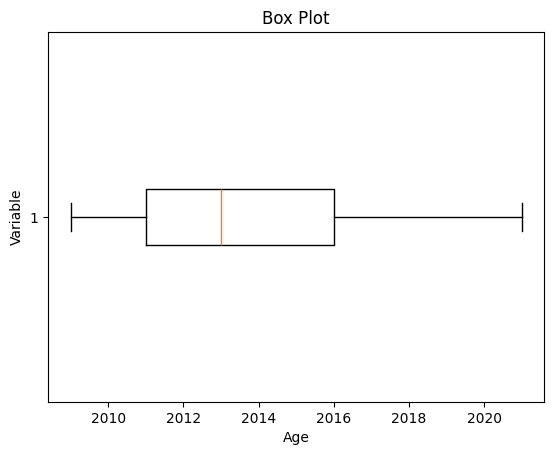

In [37]:

plt.boxplot(data['Year'], vert=False)
plt.ylabel('Variable')
plt.xlabel('Age')
plt.title('Box Plot')
plt.show()

### Data Cleaning 

In [53]:
data['APR Medical Surgical Code'].unique()

array(['M', 'P', nan, 'U'], dtype=object)

In [94]:
data['APR Medical Surgical Description'].unique()


array(['Medical', 'Surgical', 'Other'], dtype=object)

In [54]:
data['APR Severity of Illness Description'].unique()

array(['Minor', 'Moderate', 'Major', 'Extreme', 'Not Applicable', nan],
      dtype=object)

In [43]:
data[data['APR Medical Surgical Code'].isnull()]

,Year,Facility Id,Facility Name,APR DRG Code,APR Severity of Illness Code,APR DRG Description,APR Severity of Illness Description,APR Medical Surgical Code,APR Medical Surgical Description,Discharges,Mean Charge,Median Charge,Mean Cost,Median Cost
1523,2016,1,Albany Medical Center Hospital,956,0,Ungroupable,Not Applicable,NaN,Other,1,"31,000.32","31,000.32","12,274.23","12,274.23"
3546,2016,85,Auburn Community Hospital,955,0,Principal Diagnosis Invalid As Discharge Diagn...,Not Applicable,NaN,Other,1,"13,675.50","13,675.50","4,807.53","4,807.53"
4869,2016,1438,Bellevue Hospital Center,955,0,Principal Diagnosis Invalid As Discharge Diagn...,Not Applicable,NaN,Other,1,"2,545.00","2,545.00","1,322.79","1,322.79"
6362,2016,1178,Bronx-Lebanon Hospital Center - Concourse Divi...,955,0,Principal Diagnosis Invalid As Discharge Diagn...,Not Applicable,NaN,Other,10,"7,348.20","4,676.48","6,644.60","3,976.82"
7271,2016,1286,Brookdale Hospital Medical Center,955,0,Principal Diagnosis Invalid As Discharge Diagn...,Not Applicable,NaN,Other,1,"16,986.42","16,986.42","9,718.78","9,718.78"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1191076,2021,3067,Millard Fillmore Suburban Hospital,955,0,PRINCIPAL DIAGNOSIS INVALID AS DISCHARGE DIAGN...,Not Applicable,NaN,Other,4,"5,647.67","4,723.04","2,922.06","1,839.80"
1191841,2021,3376,Cohen Children's Medical Center,955,0,PRINCIPAL DIAGNOSIS INVALID AS DISCHARGE DIAGN...,Not Applicable,NaN,Other,1,"60,927.00","60,927.00","8,077.91","8,077.91"
1191842,2021,3376,Cohen Children's Medical Center,956,0,UNGROUPABLE,Not Applicable,NaN,Other,8,"16,277.62","14,935.96","2,908.46","2,524.23"
1192563,2021,3975,New York Presbyterian Hospital - Allen Hospital,955,0,PRINCIPAL DIAGNOSIS INVALID AS DISCHARGE DIAGN...,Not Applicable,NaN,Other,4,"36,222.24","43,319.90","11,303.77","13,371.07"


In [46]:
data = data['APR Medical Surgical Code'].replace(np.nan, 'U', inplace=True)


In [61]:
df_filled_dict = data.fillna({'APR Medical Surgical Code': 'U'})


In [63]:
df_filled_dict = data.fillna({'APR Severity of Illness Description': 'Not Applicable', 'APR Medical Surgical Code': 'U'})


In [65]:
data = df_filled_dict

In [66]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1192827 entries, 0 to 1192826
Data columns (total 14 columns):
 #   Column                               Non-Null Count    Dtype 
---  ------                               --------------    ----- 
 0   Year                                 1192827 non-null  int64 
 1   Facility Id                          1192827 non-null  int64 
 2   Facility Name                        1192827 non-null  object
 3   APR DRG Code                         1192827 non-null  int64 
 4   APR Severity of Illness Code         1192827 non-null  int64 
 5   APR DRG Description                  1192827 non-null  object
 6   APR Severity of Illness Description  1192827 non-null  object
 7   APR Medical Surgical Code            1192827 non-null  object
 8   APR Medical Surgical Description     1192827 non-null  object
 9   Discharges                           1192827 non-null  object
 10  Mean Charge                          1192827 non-null  object
 11  Median Char

In [68]:
data['Discharges'] = data['Discharges'].str.replace(',', '', regex = False)


In [69]:
data['Discharges'] = data['Discharges'].astype(int)


In [70]:
print(data.dtypes)


Year                                    int64
Facility Id                             int64
Facility Name                          object
APR DRG Code                            int64
APR Severity of Illness Code            int64
APR DRG Description                    object
APR Severity of Illness Description    object
APR Medical Surgical Code              object
APR Medical Surgical Description       object
Discharges                              int64
Mean Charge                            object
Median Charge                          object
Mean Cost                              object
Median Cost                            object
dtype: object


In [72]:
data['Mean Charge'] = data['Mean Charge'].str.replace(',', '', regex = False)
data['Median Charge'] = data['Median Charge'].str.replace(',', '', regex = False)
data['Mean Cost'] = data['Mean Cost'].str.replace(',', '', regex = False)
data['Median Cost'] = data['Median Cost'].str.replace(',', '', regex = False)


In [74]:
data['Mean Charge'] = data['Mean Charge'].astype(float)
data['Median Charge'] = data['Median Charge'].astype(float)
data['Mean Cost'] = data['Mean Cost'].astype(float)
data['Median Cost'] =data['Median Cost'].astype(float)



In [75]:
print(data.dtypes)


Year                                     int64
Facility Id                              int64
Facility Name                           object
APR DRG Code                             int64
APR Severity of Illness Code             int64
APR DRG Description                     object
APR Severity of Illness Description     object
APR Medical Surgical Code               object
APR Medical Surgical Description        object
Discharges                               int64
Mean Charge                            float64
Median Charge                          float64
Mean Cost                              float64
Median Cost                            float64
dtype: object


In [81]:
df2 = pd.get_dummies(data, columns=['APR Medical Surgical Code'])
# df2 = df2.astype(int)

print(df2)

         Year  Facility Id                         Facility Name  \
0        2016            4              Albany Memorial Hospital   
1        2016            4              Albany Memorial Hospital   
2        2016            4              Albany Memorial Hospital   
3        2016            4              Albany Memorial Hospital   
4        2016            4              Albany Memorial Hospital   
...       ...          ...                                   ...   
1192822  2021        10355  David H. Koch Center For Cancer Care   
1192823  2021        10355  David H. Koch Center For Cancer Care   
1192824  2021        10355  David H. Koch Center For Cancer Care   
1192825  2021        10355  David H. Koch Center For Cancer Care   
1192826  2021        10355  David H. Koch Center For Cancer Care   

         APR DRG Code  APR Severity of Illness Code  \
0                 194                             1   
1                 194                             2   
2                 

In [83]:
df2.head()

,Year,Facility Id,Facility Name,APR DRG Code,APR Severity of Illness Code,APR DRG Description,APR Severity of Illness Description,APR Medical Surgical Description,Discharges,Mean Charge,Median Charge,Mean Cost,Median Cost,APR Medical Surgical Code_M,APR Medical Surgical Code_P,APR Medical Surgical Code_U
0,2016,4,Albany Memorial Hospital,194,1,Heart Failure,Minor,Medical,2,8375.41,8375.41,3585.05,3585.05,True,False,False
1,2016,4,Albany Memorial Hospital,194,2,Heart Failure,Moderate,Medical,40,14029.82,12176.95,6182.67,5253.15,True,False,False
2,2016,4,Albany Memorial Hospital,194,3,Heart Failure,Major,Medical,70,23921.77,20229.81,11149.49,9068.10,True,False,False
3,2016,4,Albany Memorial Hospital,194,4,Heart Failure,Extreme,Medical,12,51260.45,35210.82,26081.70,15230.62,True,False,False
4,2016,4,Albany Memorial Hospital,196,4,Cardiac Arrest,Extreme,Medical,1,25357.84,25357.84,7791.75,7791.75,True,False,False


In [84]:
hot_encoded_cols = [col for col in df2.columns if col.startswith('APR Medical Surgical Code_')]

df2[hot_encoded_cols] = df2[hot_encoded_cols].astype(int)

In [85]:
df2.head()

,Year,Facility Id,Facility Name,APR DRG Code,APR Severity of Illness Code,APR DRG Description,APR Severity of Illness Description,APR Medical Surgical Description,Discharges,Mean Charge,Median Charge,Mean Cost,Median Cost,APR Medical Surgical Code_M,APR Medical Surgical Code_P,APR Medical Surgical Code_U
0,2016,4,Albany Memorial Hospital,194,1,Heart Failure,Minor,Medical,2,8375.41,8375.41,3585.05,3585.05,1,0,0
1,2016,4,Albany Memorial Hospital,194,2,Heart Failure,Moderate,Medical,40,14029.82,12176.95,6182.67,5253.15,1,0,0
2,2016,4,Albany Memorial Hospital,194,3,Heart Failure,Major,Medical,70,23921.77,20229.81,11149.49,9068.10,1,0,0
3,2016,4,Albany Memorial Hospital,194,4,Heart Failure,Extreme,Medical,12,51260.45,35210.82,26081.70,15230.62,1,0,0
4,2016,4,Albany Memorial Hospital,196,4,Cardiac Arrest,Extreme,Medical,1,25357.84,25357.84,7791.75,7791.75,1,0,0


In [95]:
df2 = pd.get_dummies(data, columns=['APR Severity of Illness Description', 'APR Medical Surgical Code', 'APR Medical Surgical Description'])


In [96]:
df2.head()

,Year,Facility Id,Facility Name,APR DRG Code,APR Severity of Illness Code,APR DRG Description,Discharges,Mean Charge,Median Charge,Mean Cost,...,APR Severity of Illness Description_Major,APR Severity of Illness Description_Minor,APR Severity of Illness Description_Moderate,APR Severity of Illness Description_Not Applicable,APR Medical Surgical Code_M,APR Medical Surgical Code_P,APR Medical Surgical Code_U,APR Medical Surgical Description_Medical,APR Medical Surgical Description_Other,APR Medical Surgical Description_Surgical
0,2016,4,Albany Memorial Hospital,194,1,Heart Failure,2,8375.41,8375.41,3585.05,...,False,True,False,False,True,False,False,True,False,False
1,2016,4,Albany Memorial Hospital,194,2,Heart Failure,40,14029.82,12176.95,6182.67,...,False,False,True,False,True,False,False,True,False,False
2,2016,4,Albany Memorial Hospital,194,3,Heart Failure,70,23921.77,20229.81,11149.49,...,True,False,False,False,True,False,False,True,False,False
3,2016,4,Albany Memorial Hospital,194,4,Heart Failure,12,51260.45,35210.82,26081.70,...,False,False,False,False,True,False,False,True,False,False
4,2016,4,Albany Memorial Hospital,196,4,Cardiac Arrest,1,25357.84,25357.84,7791.75,...,False,False,False,False,True,False,False,True,False,False


In [97]:
hot_encoded_cols = [col for col in df2.columns if col.startswith('APR Medical Surgical Code_')]

df2[hot_encoded_cols] = df2[hot_encoded_cols].astype(int)

In [98]:
hot_encoded_cols = [col for col in df2.columns if col.startswith('APR Severity of Illness Description_')]

df2[hot_encoded_cols] = df2[hot_encoded_cols].astype(int)

In [99]:
hot_encoded_cols = [col for col in df2.columns if col.startswith('APR Medical Surgical Description_')]

df2[hot_encoded_cols] = df2[hot_encoded_cols].astype(int)

In [100]:
df2.head()

,Year,Facility Id,Facility Name,APR DRG Code,APR Severity of Illness Code,APR DRG Description,Discharges,Mean Charge,Median Charge,Mean Cost,...,APR Severity of Illness Description_Major,APR Severity of Illness Description_Minor,APR Severity of Illness Description_Moderate,APR Severity of Illness Description_Not Applicable,APR Medical Surgical Code_M,APR Medical Surgical Code_P,APR Medical Surgical Code_U,APR Medical Surgical Description_Medical,APR Medical Surgical Description_Other,APR Medical Surgical Description_Surgical
0,2016,4,Albany Memorial Hospital,194,1,Heart Failure,2,8375.41,8375.41,3585.05,...,0,1,0,0,1,0,0,1,0,0
1,2016,4,Albany Memorial Hospital,194,2,Heart Failure,40,14029.82,12176.95,6182.67,...,0,0,1,0,1,0,0,1,0,0
2,2016,4,Albany Memorial Hospital,194,3,Heart Failure,70,23921.77,20229.81,11149.49,...,1,0,0,0,1,0,0,1,0,0
3,2016,4,Albany Memorial Hospital,194,4,Heart Failure,12,51260.45,35210.82,26081.70,...,0,0,0,0,1,0,0,1,0,0
4,2016,4,Albany Memorial Hospital,196,4,Cardiac Arrest,1,25357.84,25357.84,7791.75,...,0,0,0,0,1,0,0,1,0,0
